In [222]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import date

In [258]:
sns.set_style("dark")

pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Educação de nível superior no Brasil

### Integrantes do Grupo
- Marcos Vinicius Araujo
- Breno Marot
- Gabriel Banaggia


## Primeiros passos 

Esse dataset se trata de informações demográficas de nível superior na educação do brasil, como curso, renda percapta etc.

In [198]:
# lendo o dataset

df = pd.read_csv('.\\data\\education.csv', sep=';', index_col='id_masked')
df.head()

,safra_entrada,dt_nascimento,vl_renda_percapta,vl_renda_familiar_bruta_mensal,nu_percentual_solicitado,sexo,ds_raca_cor,ds_estado_civil,sg_uf_curso,no_municipio_curso,...,qtd_cursada_total,qt_semestre_financiamento,semestre_encerramento,banco,st_fase_contrato,vl_total_liberado,vl_saldo_devedor,nu_dias_atraso,vl_saldo_devedor_atrasado,vl_nota_enem_considerada
id_masked,,,,,,,,,,,,,,,,,,,,,
654,2013S1,1983-11-10,"356,00","1068,00","100,00",F,BRANCO,DIVORCIADO,MS,DOURADOS,...,2.0,2.0,12014.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
968,2014S2,1983-07-01,"1916,85","1916,85","100,00",F,PARDO,CASADO,MA,SAO LUIS,...,2.0,2.0,22015.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1067,2013S1,1989-12-07,"2700,00","2700,00","100,00",F,NEGRO,SOLTEIRO,RO,CACOAL,...,10.0,10.0,NaN,BB,A,"57902,67","55726,23",0.0,"0,00",NaN
2214,2012S1,1979-10-08,"272,99","818,98","100,00",F,PARDO,SOLTEIRO,SE,ARACAJU,...,10.0,10.0,NaN,CX,A,"56159,08","64236,79",1025.0,"14170,86",NaN
2298,2013S2,1989-04-09,"1200,00","1200,00","100,00",F,PARDO,CASADO,RJ,CABO FRIO,...,3.0,3.0,12015.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2864538 entries, 654 to 2864538
Data columns (total 24 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   safra_entrada                   object 
 1   dt_nascimento                   object 
 2   vl_renda_percapta               object 
 3   vl_renda_familiar_bruta_mensal  object 
 4   nu_percentual_solicitado        object 
 5   sexo                            object 
 6   ds_raca_cor                     object 
 7   ds_estado_civil                 object 
 8   sg_uf_curso                     object 
 9   no_municipio_curso              object 
 10  no_curso                        object 
 11  co_curso                        float64
 12  ultimo_aditamento               object 
 13  tipo_ultimo_aditamento          object 
 14  qtd_cursada_total               float64
 15  qt_semestre_financiamento       float64
 16  semestre_encerramento           float64
 17  banco                         

In [200]:
%timeit df

77.9 ns ± 3.13 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


## Performance do dataset

Um passo importante para focar é na performance do dataset e a alteração para tipagem correta. Com eles, podemos diminuir o tempo de execução das operações. [Documentação do pandas sobre performance](https://pandas.pydata.org/docs/user_guide/enhancingperf.html)

In [201]:
# removing problematic line
df = df.drop([df.index[2516155]])

# performance
df['dt_nascimento'] = pd.to_datetime(df['dt_nascimento'], yearfirst=True, format="%Y-%m-%d")
df['vl_renda_percapta'] = df['vl_renda_percapta'].apply(lambda x : float(str(x).replace(',', '.')))
df['vl_renda_familiar_bruta_mensal'] = df['vl_renda_familiar_bruta_mensal'].apply(lambda x : float(str(x).replace(',', '.')))
df['nu_percentual_solicitado'] = df['nu_percentual_solicitado'].apply(lambda x : float(str(x).replace(',', '.')))
df['vl_total_liberado'] = df['vl_total_liberado'].apply(lambda x : float(str(x).replace(',', '.')))
df['vl_saldo_devedor'] = df['vl_saldo_devedor'].apply(lambda x : float(str(x).replace(',', '.')))
df['nu_dias_atraso'] = df['nu_dias_atraso'].fillna(0).astype(int)
df['vl_saldo_devedor_atrasado'] = df['vl_saldo_devedor_atrasado'].apply(lambda x : float(str(x).replace(',', '.')))
df['co_curso'] = df['co_curso'].fillna(0).astype(int)
df['qtd_cursada_total'] = df['qtd_cursada_total'].fillna(0).astype(int)
df['qt_semestre_financiamento'] = df['qt_semestre_financiamento'].fillna(0).astype(int)
df['semestre_encerramento'] = df['semestre_encerramento'].astype(str)

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2864537 entries, 654 to 2864538
Data columns (total 24 columns):
 #   Column                          Dtype         
---  ------                          -----         
 0   safra_entrada                   object        
 1   dt_nascimento                   datetime64[ns]
 2   vl_renda_percapta               float64       
 3   vl_renda_familiar_bruta_mensal  float64       
 4   nu_percentual_solicitado        float64       
 5   sexo                            object        
 6   ds_raca_cor                     object        
 7   ds_estado_civil                 object        
 8   sg_uf_curso                     object        
 9   no_municipio_curso              object        
 10  no_curso                        object        
 11  co_curso                        int32         
 12  ultimo_aditamento               object        
 13  tipo_ultimo_aditamento          object        
 14  qtd_cursada_total               int32         
 15  q

In [203]:
%timeit df

74.5 ns ± 5.23 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [204]:
# removendo colunas redundantes

df.drop(
        ['co_curso',
         'st_fase_contrato',
         'ultimo_aditamento',
         'no_municipio_curso',
         'qt_semestre_financiamento'], 
        axis=1, 
        inplace=True
    )

In [205]:
df['banco'].count() / df['banco'].size

0.9597924551157831

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2864537 entries, 654 to 2864538
Data columns (total 19 columns):
 #   Column                          Dtype         
---  ------                          -----         
 0   safra_entrada                   object        
 1   dt_nascimento                   datetime64[ns]
 2   vl_renda_percapta               float64       
 3   vl_renda_familiar_bruta_mensal  float64       
 4   nu_percentual_solicitado        float64       
 5   sexo                            object        
 6   ds_raca_cor                     object        
 7   ds_estado_civil                 object        
 8   sg_uf_curso                     object        
 9   no_curso                        object        
 10  tipo_ultimo_aditamento          object        
 11  qtd_cursada_total               int32         
 12  semestre_encerramento           object        
 13  banco                           object        
 14  vl_total_liberado               float64       
 15  v

# Análise Exploratória

## Analisando cursos

In [207]:
df.corr(numeric_only=True)

,vl_renda_percapta,vl_renda_familiar_bruta_mensal,nu_percentual_solicitado,qtd_cursada_total,vl_total_liberado,vl_saldo_devedor,nu_dias_atraso,vl_saldo_devedor_atrasado,vl_nota_enem_considerada
vl_renda_percapta,1.000000,0.714513,-0.385584,0.038498,0.152200,0.124507,-0.174767,-0.117342,0.049046
vl_renda_familiar_bruta_mensal,0.714513,1.000000,-0.375722,0.041382,0.202678,0.172401,-0.230363,-0.156579,0.069692
nu_percentual_solicitado,-0.385584,-0.375722,1.000000,0.185169,0.159271,0.149658,0.197273,0.233618,-0.060065
qtd_cursada_total,0.038498,0.041382,0.185169,1.000000,0.483043,0.464043,-0.194195,0.113829,-0.036211
vl_total_liberado,0.152200,0.202678,0.159271,0.483043,1.000000,0.972824,-0.209442,0.065881,0.096336
vl_saldo_devedor,0.124507,0.172401,0.149658,0.464043,0.972824,1.000000,-0.137951,0.133712,0.095145
nu_dias_atraso,-0.174767,-0.230363,0.197273,-0.194195,-0.209442,-0.137951,1.000000,0.560894,-0.055824
vl_saldo_devedor_atrasado,-0.117342,-0.156579,0.233618,0.113829,0.065881,0.133712,0.560894,1.000000,-0.049673
vl_nota_enem_considerada,0.049046,0.069692,-0.060065,-0.036211,0.096336,0.095145,-0.055824,-0.049673,1.000000


<Axes: title={'center': 'Top 25 cursos financiados'}, ylabel='no_curso'>

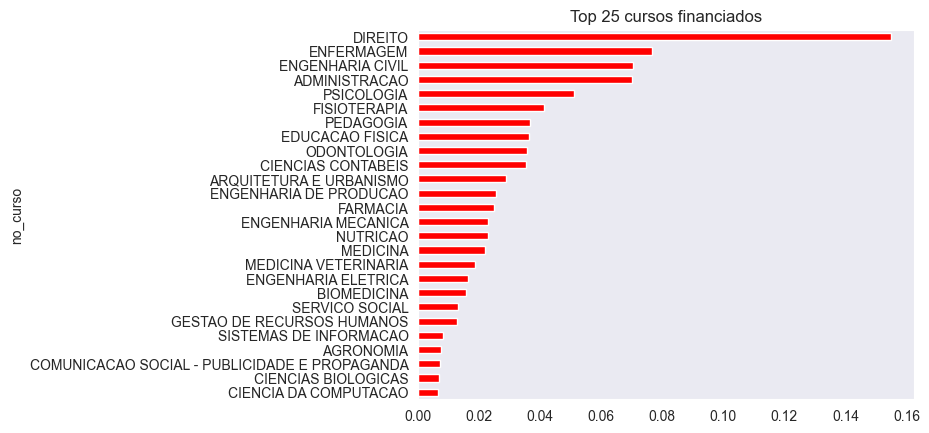

In [208]:
freq_curso = df['no_curso'].value_counts(normalize=True)

freq_curso[25::-1].plot(kind='barh', color='red', title='Top 25 cursos financiados')

In [209]:
f'Percentual de pessoal dos Top 25 cursos:{freq_curso[:25].sum() / freq_curso.sum() * 100 : .2f}%'

'Percentual de pessoal dos Top 25 cursos: 86.05%'

## Safra de entrada

In [210]:
df['safra_entrada'].unique()

array(['2013S1', '2014S2', '2012S1', '2013S2', '2010S2', '2011S2',
       '2011S1', '2012S2', '2014S1', '2010S1', '2015S1', '2018S1',
       '2017S2', '2017S1', '2016S2', '2022S1', '2016S1', '2018S2',
       '2021S2', '2019S1', '2015S2', '2021S1', '2019S2', '2020S1',
       '2020S2'], dtype=object)

In [211]:
df['safra_entrada'] = df['safra_entrada'].apply(lambda x : x.replace('S', '.'))

df['safra_entrada'].unique()

array(['2013.1', '2014.2', '2012.1', '2013.2', '2010.2', '2011.2',
       '2011.1', '2012.2', '2014.1', '2010.1', '2015.1', '2018.1',
       '2017.2', '2017.1', '2016.2', '2022.1', '2016.1', '2018.2',
       '2021.2', '2019.1', '2015.2', '2021.1', '2019.2', '2020.1',
       '2020.2'], dtype=object)

## Data de Nascimento **TODO**

In [241]:
def calculate_age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

In [251]:
df['idade'] = df['dt_nascimento'].apply(calculate_age)

In [253]:
df['idade'].idxmax()

2800007

In [254]:
calculate_age(df.iloc[2800007]['dt_nascimento'])

59

## Renda

In [259]:
df[['vl_renda_percapta', 'vl_renda_familiar_bruta_mensal' ]].describe()

,vl_renda_percapta,vl_renda_familiar_bruta_mensal
count,2864537.000,2864537.000
mean,822.695,2180.532
std,609.441,1871.722
min,0.000,0.000
25%,450.000,1000.000
50%,692.790,1600.000
75%,1000.000,2700.000
max,23151.950,89000.000


In [271]:
(df['vl_renda_familiar_bruta_mensal'] \
    .loc[df['vl_renda_familiar_bruta_mensal'].isna()] \
    .count()
,
 
df['vl_renda_percapta'] \
    .loc[df['vl_renda_percapta'].isna()] \
    .count())

(0, 0)

<Axes: >

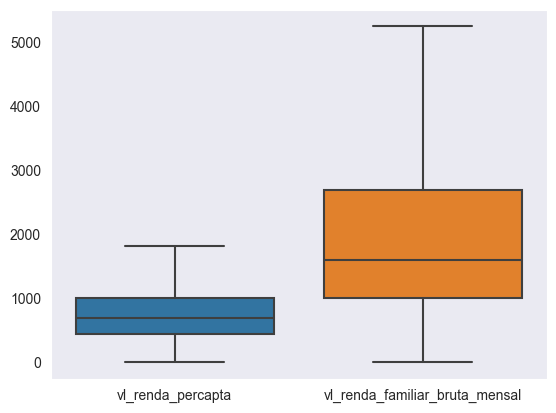

In [275]:
df_rendas = df[['vl_renda_percapta', 'vl_renda_familiar_bruta_mensal' ]]

sns.boxplot(
    data = df_rendas,
    showfliers=False
)

# Removendo outliers

Podemos perceebr que a coluna _no_curso_ tem um número exorbitante de **outliers**. Isso não significa que esses cursos que estão presentes na base são frutos de algum tipo de má digitação, ou erro em geral. Essa remoção está sendo feita, pois existem muitos cursos com poucas pessoas inscritas. Podemos ver isso no gráfico abaixo

In [213]:
df_top_cursos = df.loc[~df['no_curso'].isin(freq_curso[freq_curso > 100].index)]

df_top_cursos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2864537 entries, 654 to 2864538
Data columns (total 19 columns):
 #   Column                          Dtype         
---  ------                          -----         
 0   safra_entrada                   object        
 1   dt_nascimento                   datetime64[ns]
 2   vl_renda_percapta               float64       
 3   vl_renda_familiar_bruta_mensal  float64       
 4   nu_percentual_solicitado        float64       
 5   sexo                            object        
 6   ds_raca_cor                     object        
 7   ds_estado_civil                 object        
 8   sg_uf_curso                     object        
 9   no_curso                        object        
 10  tipo_ultimo_aditamento          object        
 11  qtd_cursada_total               int32         
 12  semestre_encerramento           object        
 13  banco                           object        
 14  vl_total_liberado               float64       
 15  v